In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
from os import listdir

In [3]:
classes = [
  'Avocado',
  'Lemon',
  'Mango',
  'Kiwi',
  'Strawberry',
]

In [4]:
num_class = len(classes)

In [5]:
train_dir = './fruits-360-small/Training'
valid_dir = './fruits-360-small/Validation'

In [6]:
from glob import glob

In [7]:
train_image_files = glob(train_dir + '/*/*.jp*g')
valid_image_files = glob(valid_dir + '/*/*.jp*g')

In [8]:
num_train = len(train_image_files)
num_valid = len(valid_image_files)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
%matplotlib inline

In [11]:
import numpy as np

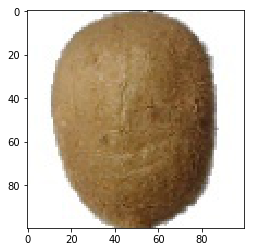

In [12]:
rand_image_name = np.random.choice(train_image_files)
rand_image = mpimg.imread(rand_image_name)
plt.imshow(rand_image)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
gen = ImageDataGenerator(rotation_range=20,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True,
                        preprocessing_function=lambda x: x / 255.0)

In [14]:
test_gen = gen.flow_from_directory(valid_dir, target_size=(100,100))
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v] = k

Found 793 images belonging to 5 classes.
{'Avocado': 0, 'Kiwi': 1, 'Lemon': 2, 'Mango': 3, 'Strawberry': 4}


In [15]:
for x,y in test_gen:
    print(x.shape)
    print(y.shape)
    break

(32, 100, 100, 3)
(32, 5)


min: 0.06585782 max: 1.0


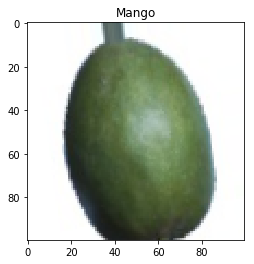

In [17]:
for x,y in test_gen:
    print('min:', x[0].min(), 'max:', x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    break

In [16]:
train_generator = gen.flow_from_directory(train_dir, target_size=(100,100))
test_generator = gen.flow_from_directory(valid_dir, target_size=(100,100))

Found 2367 images belonging to 5 classes.
Found 793 images belonging to 5 classes.


In [17]:
num_train = len(train_generator.classes)
num_test = len(test_generator.classes)

In [18]:
batch_size = 32

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(input_shape=(100,100,3), filters=6, kernel_size=(4,4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=12, kernel_size=(4,4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=24, kernel_size=(4,4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=num_class, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
result = model.fit_generator(generator=train_generator,              
                            steps_per_epoch=num_train // batch_size,
                            epochs=3,
                            validation_data=test_generator,
                            validation_steps=num_valid // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
73/73 [==============================] - 19s 265ms/step - loss: 0.2629 - acc: 0.9118 - val_loss: 1.5753 - val_acc: 0.7773
Epoch 2/3
73/73 [==============================] - 20s 275ms/step - loss: 0.0566 - acc: 0.9850 - val_loss: 8.9564e-04 - val_acc: 1.0000
Epoch 3/3
73/73 [==============================] - 20s 278ms/step - loss: 0.0184 - acc: 0.9953 - val_loss: 0.0012 - val_acc: 1.0000


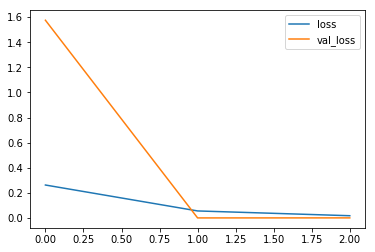

In [30]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

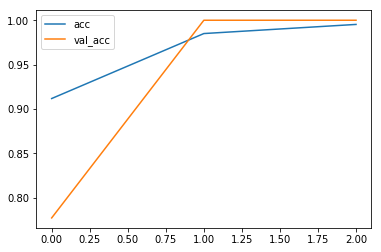

In [31]:
plt.plot(result.history['acc'], label='acc')
plt.plot(result.history['val_acc'], label='val_acc')
plt.legend()

In [19]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Flatten, Dropout

In [20]:
i = Input(shape=(100,100,3))
conv1 = Conv2D(filters=6, kernel_size=(4,4), activation='relu')(i)
norm1 = BatchNormalization()(conv1)
mpool1 = MaxPool2D()(norm1)

conv2 = Conv2D(filters=12, kernel_size=(4,4), activation='relu')(mpool1)
norm2 = BatchNormalization()(conv2)
mpool2 = MaxPool2D()(norm2)

conv3 = Conv2D(filters=24, kernel_size=(3,3), activation='relu')(mpool2)
norm3 = BatchNormalization()(conv3)
mpool3 = MaxPool2D()(norm3)

flat = Flatten()(mpool3)
dense1 = Dense(units=1024, activation='relu')(flat)
drop = Dropout(rate=0.5)(dense1)

dense2 = Dense(units=num_class, activation='softmax')(drop)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
model2 = Model(inputs=i, outputs=dense2)

In [24]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 6)         294       
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 6)         24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 12)        1164      
_________________________________________________________________
batch_normalization_2 (Batch (None, 45, 45, 12)        48        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 12)        0         
__________

In [25]:
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
result2 = model2.fit_generator(generator=train_generator,              
                            steps_per_epoch=num_train // batch_size,
                            epochs=3,
                            validation_data=test_generator,
                            validation_steps=num_valid // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
73/73 [==============================] - 20s 280ms/step - loss: 0.6699 - acc: 0.9170 - val_loss: 2.5060 - val_acc: 0.8112
Epoch 2/3
73/73 [==============================] - 21s 284ms/step - loss: 0.0427 - acc: 0.9932 - val_loss: 0.0145 - val_acc: 0.9961
Epoch 3/3
73/73 [==============================] - 21s 286ms/step - loss: 0.0872 - acc: 0.9897 - val_loss: 0.0319 - val_acc: 0.9895


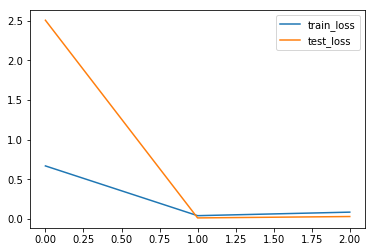

In [27]:
plt.plot(result2.history['loss'], label='train_loss')
plt.plot(result2.history['val_loss'], label='test_loss')
plt.legend()

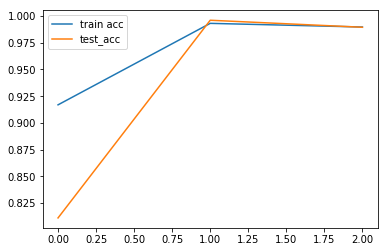

In [28]:
plt.plot(result2.history['acc'], label='train acc')
plt.plot(result2.history['val_acc'], label='test_acc')
plt.legend()